### Web parsing with Selenium

With Selenium we can imitate a user's actions in a browser - actually open a site on a computer and perform our prescribed actions.

In [28]:
from selenium.webdriver import Chrome
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By 
from bs4 import BeautifulSoup
from time import sleep

In [29]:
# Чтобы воспользоваться библиотекой Selenium, необходимо скачать ChromeDriver
s = Service("D:\EXEs\chromedriver_win32\chromedriver.exe")

In [30]:
browser = webdriver.Chrome(service=s) # открываем браузер Chrome
browser.maximize_window()

In [4]:
# browser = Chrome("D:\EXEs\chromedriver_win32\chromedriver.exe")

Будем работать с сайтом **[Реестр с информацией о государственных муниципальных учреждениях]**(https://bus.gov.ru/registry). Попробуем найти в нем онкологические диспансеры и посмотрим, как будет выглядеть ссылка.

In [34]:
# Теперь мы можем управлять браузером с помощью команд. Чтобы попасть на сайт, создадим переменную url и укажем 
# нужный сайт (в нашем примере: https://bus.gov.ru/registry)

In [31]:
url = 'https://bus.gov.ru/registry'

In [32]:
browser.get(url) # сайт загружается в Chrome

In [33]:
# ищем нужный элемент страницы (ячейку поиска организации) по тегу
browser.find_element(By.TAG_NAME, "input")

<selenium.webdriver.remote.webelement.WebElement (session="f5ff5bae12ebc8ce78f866be83e3fc53", element="26e3c7f0-2099-42ca-871c-f612f5c1f638")>

или

In [8]:
# ищем нужный элемент страницы (ячейку поиска организации) по классу
browser.find_element(By.CLASS_NAME, "search-input")

<selenium.webdriver.remote.webelement.WebElement (session="70f390f08b5a8825e0ec389144a8e4fa", element="17e7788a-24d1-49e9-b1d9-086510098ae1")>

или

In [9]:
# ищем нужный элемент страницы (ячейку поиска организации) по xpath
browser.find_element(By.XPATH, "/html/body/div[2]/ui-view/form/div[1]/div[1]/label/input")

<selenium.webdriver.remote.webelement.WebElement (session="70f390f08b5a8825e0ec389144a8e4fa", element="17e7788a-24d1-49e9-b1d9-086510098ae1")>

или

In [10]:
# ищем нужный элемент страницы (ячейку поиска организации) по css selector'у
browser.find_element(By.CSS_SELECTOR, "body > div.main > ui-view > form > div:nth-child(1) > div:nth-child(1) > label > input")

<selenium.webdriver.remote.webelement.WebElement (session="70f390f08b5a8825e0ec389144a8e4fa", element="17e7788a-24d1-49e9-b1d9-086510098ae1")>

In [11]:
# Можем найти ссылку по тексту на странице
browser.find_element(By.LINK_TEXT, 'Результаты независимой оценки').get_attribute('href')

'https://bus.gov.ru/top-organizations-second'

In [35]:
# Вернемся к полю ввода. Выберем одну из наших поисковых функций и зададим этой переменной название input_tab
input_tab = browser.find_element(By.CSS_SELECTOR, "body > div.main > ui-view > form > div:nth-child(1) > div:nth-child(1) > label > input")

In [36]:
input_tab

<selenium.webdriver.remote.webelement.WebElement (session="f5ff5bae12ebc8ce78f866be83e3fc53", element="8e03e3ec-c4bf-4e98-b5b1-fd36a043d81e")>

In [37]:
# Выбранный нами элемент страницы - поисковая строка.
# Введем туда поисковый запрос
input_tab.send_keys('Онкологический диспансер')

In [38]:
# Теперь нам нужно нажать на кнопку поиска на странице.
# Точно найти располоджение этой кнопки поможет xpath
button = browser.find_element(By.XPATH, '//button[@type="submit"]') # button - тег кнопки; type="submit" - идентификатор нужной нам конкретной кнопки
button.click() # кликнем по кнопке

# В браузере появится выдача по ранее введенному запросу 'Онкологический диспансер'.

или

In [25]:
# Или можно сымитировать нажатие enter сразу после ввода запроса в поисковую строку
input_tab.send_keys(Keys.ENTER)

Теперь, когда у нас есть отсортированная база, можем начать ее парсить. Например, попробуем получить ссылки на регистрационные данные каждой организации и сделать таблицу из этих ссылок и названий соответствующих организаций.

'<html lang="en" class=""><head><style type="text/css">[uib-typeahead-popup].dropdown-menu{display:block;}</style><style type="text/css">.uib-time input{width:50px;}</style><style type="text/css">[uib-tooltip-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.top-right > .tooltip-arrow,[uib-tooltip-popup].tooltip.bottom-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.bottom-right > .tooltip-arrow,[uib-tooltip-popup].tooltip.left-top > .tooltip-arrow,[uib-tooltip-popup].tooltip.left-bottom > .tooltip-arrow,[uib-tooltip-popup].tooltip.right-top > .tooltip-arrow,[uib-tooltip-popup].tooltip.right-bottom > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.top-right > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.bottom-left > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.bottom-right > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.left-top > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.left-bottom > .toolt
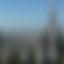

In [39]:
# Теперь нам нужно получить данные каждого элемента (онкологического диспансера) со страницы
soup = BeautifulSoup(browser.page_source, 'lxml')
browser.page_source

In [41]:
# Получим текст из первой ссылки на странице. Название организации
name = soup.find('a', class_= 'result__title').text.strip()
name

'АВТОНОМНОЕ УЧРЕЖДЕНИЕ ЧУВАШСКОЙ РЕСПУБЛИКИ "РЕСПУБЛИКАНСКИЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР" МИНИСТЕРСТВА ЗДРАВООХРАНЕНИЯ ЧУВАШСКОЙ РЕСПУБЛИКИ'

In [43]:
# Получим ссылку на регистрационные данные
link = soup.find('a', class_= 'result__button_registry').get('href')
link

'/agency/22908/register-info'

In [44]:
# Получим ссылку целиком
url = 'https://bus.gov.ru/registry'
link = url + soup.find('a', class_= 'result__button_registry').get('href')
link

'https://bus.gov.ru/registry/agency/22908/register-info'

Мы разобрались с первым элементом из списка поисковой выдачи. Но нам нужно пройтись по всем, а еще не забыть про следующие страницы

In [45]:
# Найдем все элементы на странице
soup.findAll('div', class_="result")
len(soup.findAll('div', class_="result"))

10

или

In [46]:
# Найдем все элементы на странице с помощью Selenium
browser.find_elements(By.CLASS_NAME, "result")
len(browser.find_elements(By.CLASS_NAME, "result"))

10

In [47]:
# Итак, все организации на странице
orgs = soup.findAll('div', class_="result")
orgs

[<div class="result" ng-repeat="item in data.agencies">
 <div class="padding-wrap advanced-result__wrap">
 <div class="advanced-result__info">
 <div class="advanced-result__number" gmu-list-index="$index" gmu-list-index-page='form.params["d-442831-p"] || form.params.page || form.page' gmu-list-index-page-size="form.params.pageSize || form.pageSize">1. </div>
 <!-- --><div class="result__number" ng-if="item.code || item.summaryRegistryCode ">
 <p>
 <!-- --><span ng-if="item.code &amp;&amp; !(item.code.length === 13 &amp;&amp; item.code[0] === '8')">Код ПГМУ:</span><!-- -->
 <!-- --><span ng-bind-html="item.code" ng-if="item.code &amp;&amp; !(item.code.length === 13 &amp;&amp; item.code[0] === '8')">0315200000013</span><!-- -->
 <!-- --><span ng-if="item.summaryRegistryCode"> Код Сводного реестра:</span><!-- -->
 <!-- --><span ng-bind-html="item.summaryRegistryCode" ng-if="item.summaryRegistryCode">972Н3038</span><!-- -->
 <!-- -->
 </p>
 </div><!-- -->
 <!-- --><a class="result__title" 

In [48]:
# Найдем данные по всем элементам на странице
# Создаем цикл. Для каждой организации будем доставать сначала название, затем ссылку
browser = webdriver.Chrome(service=s) # открываем браузер Chrome

url = 'https://bus.gov.ru/registry'
browser.get(url) # сайт загружается в Chrome

browser.find_element(By.CLASS_NAME, "search-input")

input_tab.send_keys('Онкологический диспансер')
input_tab.send_keys(Keys.ENTER)

sleep(3) # небольшая задержка, чтобы старница точно прогрузилась целиком

data = []
for org in orgs:
    name = org.find('a', class_= 'result__title').text.strip()                # Название организации
    link = url + org.find('a', class_= 'result__button_registry').get('href') # Ссылка на регистрационные данные
    data.append([name, link])

In [49]:
len(data)

10

In [50]:
data

[['АВТОНОМНОЕ УЧРЕЖДЕНИЕ ЧУВАШСКОЙ РЕСПУБЛИКИ "РЕСПУБЛИКАНСКИЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР" МИНИСТЕРСТВА ЗДРАВООХРАНЕНИЯ ЧУВАШСКОЙ РЕСПУБЛИКИ',
  'https://bus.gov.ru/registry/agency/22908/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСКОЙ ОБЛАСТИ "ВОЛОГОДСКИЙ ОБЛАСТНОЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/39579/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОРОНЕЖСКОЙ ОБЛАСТИ "ВОРОНЕЖСКИЙ ОБЛАСТНОЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/65598/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОМСКОЙ ОБЛАСТИ "КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/51518/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОРЛОВСКОЙ ОБЛАСТИ "ОРЛОВСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/80338/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ  УДМУРТСКОЙ РЕСПУБЛИКИ "РЕСПУБЛИКАНСКИЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕ

In [63]:
# Пропишем переключение страницы на следующую, чтобы найти все данные

s = Service("D:\EXEs\chromedriver_win32\chromedriver.exe")
browser = webdriver.Chrome(service=s) # открываем браузер Chrome
browser.maximize_window()
url = 'https://bus.gov.ru/registry'
browser.get(url)

input_tab = browser.find_element(By.CSS_SELECTOR, "body > div.main > ui-view > form > div:nth-child(1) > div:nth-child(1) > label > input")
input_tab.send_keys('Онкологический диспансер')
input_tab.send_keys(Keys.ENTER)

sleep(5)

data=[]
for p in range(11):
    print(p)
    soup = BeautifulSoup(browser.page_source, 'lxml')
    orgs = soup.findAll('div', class_="result")
    
    for org in orgs:
        try: 
            name = org.find('a', class_= 'result__title').text.strip()                        
        except AttributeError:
            name = org.find('div', class_= 'result__common_title').text.strip()
        link = url + org.find('a', class_= 'result__button_registry').get('href') # Ссылка на регистрационные данные
        data.append([name, link])
    print(len(data))
    
    try:
        browser.find_element(By.CLASS_NAME, "pagination__next").click() # Кликаем на кнопку следующей страницы
    except NoSuchElementException:
        break
    sleep(10)

0
10
1
20
2
30
3
40
4
50
5
60
6
70
7
80
8
90
9
95


In [64]:
len(data)

95

In [65]:
data

[['АВТОНОМНОЕ УЧРЕЖДЕНИЕ ЧУВАШСКОЙ РЕСПУБЛИКИ "РЕСПУБЛИКАНСКИЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР" МИНИСТЕРСТВА ЗДРАВООХРАНЕНИЯ ЧУВАШСКОЙ РЕСПУБЛИКИ',
  'https://bus.gov.ru/registry/agency/22908/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСКОЙ ОБЛАСТИ "ВОЛОГОДСКИЙ ОБЛАСТНОЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/39579/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОРОНЕЖСКОЙ ОБЛАСТИ "ВОРОНЕЖСКИЙ ОБЛАСТНОЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/65598/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОМСКОЙ ОБЛАСТИ "КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/51518/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОРЛОВСКОЙ ОБЛАСТИ "ОРЛОВСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕР"',
  'https://bus.gov.ru/registry/agency/80338/register-info'],
 ['БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ  УДМУРТСКОЙ РЕСПУБЛИКИ "РЕСПУБЛИКАНСКИЙ КЛИНИЧЕСКИЙ ОНКОЛОГИЧЕСКИЙ ДИСПАНСЕ

In [66]:
# Сохраним полученные данные в pandas dataframe
import pandas as pd

df = pd.DataFrame(data, columns=['title', 'link'])

In [67]:
df

,title,link
0,"АВТОНОМНОЕ УЧРЕЖДЕНИЕ ЧУВАШСКОЙ РЕСПУБЛИКИ ""РЕ...",https://bus.gov.ru/registry/agency/22908/regis...
1,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСК...,https://bus.gov.ru/registry/agency/39579/regis...
2,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОРОНЕЖСК...,https://bus.gov.ru/registry/agency/65598/regis...
3,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОМСКОЙ ОБ...,https://bus.gov.ru/registry/agency/51518/regis...
4,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОРЛОВСКОЙ...,https://bus.gov.ru/registry/agency/80338/regis...
...,...,...
90,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749789/reg...
91,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749885/reg...
92,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749577/reg...
93,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749580/reg...


In [74]:
# Запишем полученную таблицу в .csv файл для дальнейшей работы
df.to_csv('D:\BSNS\STUDY\Python\IStories_Workshop\Data\oncology_orgs_ru.csv', sep=';', encoding='utf8', index=False)

In [75]:
# Прочитаем наш файл
test = pd.read_csv('D:\BSNS\STUDY\Python\IStories_Workshop\Data\oncology_orgs_ru.csv', sep=';')
test

,title,link
0,"АВТОНОМНОЕ УЧРЕЖДЕНИЕ ЧУВАШСКОЙ РЕСПУБЛИКИ ""РЕ...",https://bus.gov.ru/registry/agency/22908/regis...
1,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСК...,https://bus.gov.ru/registry/agency/39579/regis...
2,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОРОНЕЖСК...,https://bus.gov.ru/registry/agency/65598/regis...
3,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОМСКОЙ ОБ...,https://bus.gov.ru/registry/agency/51518/regis...
4,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ОРЛОВСКОЙ...,https://bus.gov.ru/registry/agency/80338/regis...
...,...,...
90,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749789/reg...
91,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749885/reg...
92,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749577/reg...
93,ТЕРРИТОРИАЛЬНО ОБОСОБЛЕННОЕ СТРУКТУРНОЕ ПОДРАЗ...,https://bus.gov.ru/registry/agency/2749580/reg...
